<a href="https://colab.research.google.com/github/tiyasadey3/LGMVIP-DataScience/blob/main/Task_1_Intermediate_level_EDA_Terrorism_TIYASA_DEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LetsGrowMore**

## **Intermediate level task :**

## **Task - 1 : Exploratory Data Analysis on Terrorism.**

## **Task Details : As a security/defense analyst, we will try to find out the hot zone of terrorism.**

## **AUTHOR : TIYASA DEY**

## **Dataset:**

https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

## **Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df=df[['iyear','imonth','iday','country_txt','city','region_txt','latitude','longitude','extended','target1','success','suicide','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','nkill','nwound']]

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded',
                   'targtype1_txt':'Target_Type','gname':'group_name','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended','latitude':'Latitude','longitude':'Longitude', 'target1': 'Target','city':'City'}, inplace = True)

In [ ]:
df.head()

,Year,Month,Day,Country,City,region,Latitude,Longitude,Extended,Target,success,suicide,AttackType,Target_Type,group_name,Weapon_type,Killed,Wounded
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,0,Julio Guzman,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,Mexico city,North America,19.371887,-99.086624,0,"Nadine Chaval, daughter",1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Unknown,Southeast Asia,15.478598,120.599741,0,Employee,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Athens,Western Europe,37.997490,23.762728,0,U.S. Embassy,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,0,U.S. Consulate,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:

df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
City             434
region             0
Latitude        4556
Longitude       4557
Extended           0
Target           636
success            0
suicide            0
AttackType         0
Target_Type        0
group_name         0
Weapon_type        0
Killed         10313
Wounded        16311
dtype: int64

In [ ]:
df['Latitude']=df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude']=df['Longitude'].fillna(df['Longitude'].mean())
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df['Target']=df["Target"].fillna(0)

In [ ]:

df.isnull().sum()

Year             0
Month            0
Day              0
Country          0
City           434
region           0
Latitude         0
Longitude        0
Extended         0
Target           0
success          0
suicide          0
AttackType       0
Target_Type      0
group_name       0
Weapon_type      0
Killed           0
Wounded          0
dtype: int64

## **Data visualization**

In [ ]:
df.corr()

,Year,Month,Day,Latitude,Longitude,Extended,success,suicide,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.164224,0.003853,0.091754,-0.082963,0.137736,0.021252,0.017484
Month,0.000139,1.000000,0.005497,-0.015776,-0.003831,-0.000468,-0.002845,0.003071,0.004031,0.003178
Day,0.018254,0.005497,1.000000,0.003378,-0.002254,-0.004700,-0.011802,0.003593,-0.003225,-0.001082
Latitude,0.164224,-0.015776,0.003378,1.000000,0.001463,-0.024256,-0.073223,0.068519,-0.012940,0.015909
Longitude,0.003853,-0.003831,-0.002254,0.001463,1.000000,0.000513,-0.000852,0.000485,-0.000577,0.000205
Extended,0.091754,-0.000468,-0.004700,-0.024256,0.000513,1.000000,0.073233,-0.033961,0.014586,-0.010175
success,-0.082963,-0.002845,-0.011802,-0.073223,-0.000852,0.073233,1.000000,-0.031155,0.049619,0.023346
suicide,0.137736,0.003071,0.003593,0.068519,0.000485,-0.033961,-0.031155,1.000000,0.136385,0.096101
Killed,0.021252,0.004031,-0.003225,-0.012940,-0.000577,0.014586,0.049619,0.136385,1.000000,0.443326
Wounded,0.017484,0.003178,-0.001082,0.015909,0.000205,-0.010175,0.023346,0.096101,0.443326,1.000000


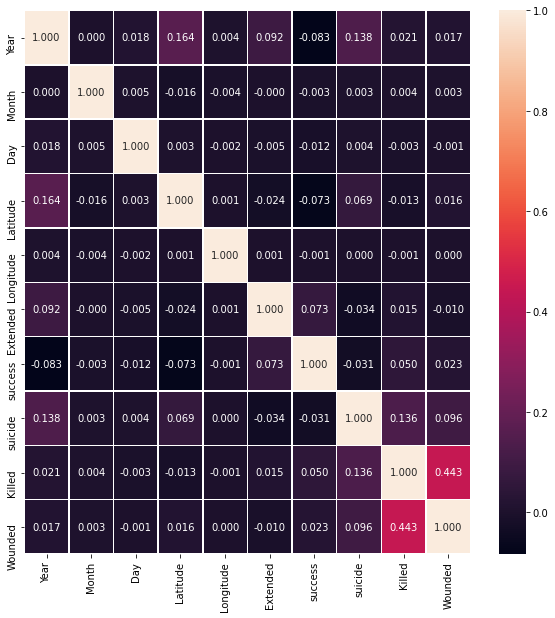

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.3f')

In [ ]:
df["Total_affected"]=df["Killed"]+df["Wounded"]

In [ ]:
df.head()

,Year,Month,Day,Country,City,region,Latitude,Longitude,Extended,Target,success,suicide,AttackType,Target_Type,group_name,Weapon_type,Killed,Wounded,Total_affected
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,0,Julio Guzman,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,Mexico city,North America,19.371887,-99.086624,0,"Nadine Chaval, daughter",1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Unknown,Southeast Asia,15.478598,120.599741,0,Employee,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Athens,Western Europe,37.997490,23.762728,0,U.S. Embassy,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,0,U.S. Consulate,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,0.0


## **1. Year wise Attacks**

In [ ]:

years = pd.DataFrame(df["Year"].value_counts())
years.head(10)

,Year
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826
2008,4805


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


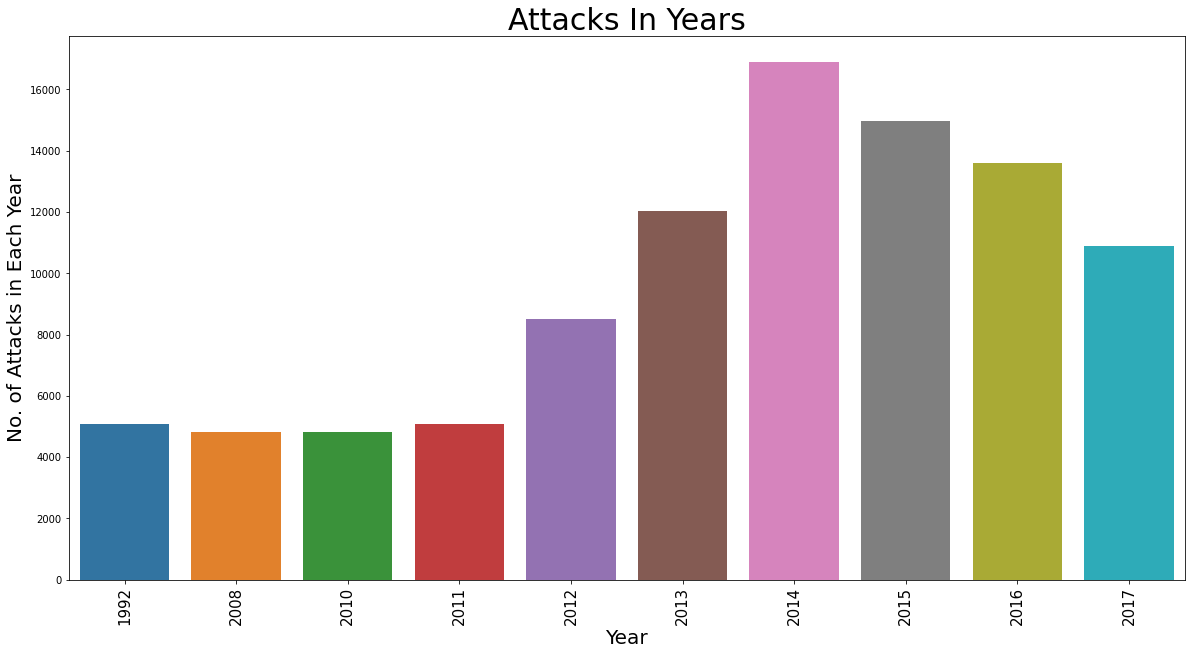

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Year'].value_counts()[:10].index,df['Year'].value_counts()[:10].values)
plt.title('Attacks In Years',fontsize =30)
plt.xlabel('Year',fontsize =20)
plt.ylabel('No. of Attacks in Each Year',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **2. Number of killed in each year**

In [ ]:

year_s=df[["Year",'Killed']].groupby("Year").sum().sort_values (by = 'Killed',ascending=False)
year_s.head(10)

,Killed
Year,
2014,44490.0
2015,38853.0
2016,34871.0
2017,26445.0
2013,22273.0
2012,15497.0
2007,12824.0
1997,10924.0
1984,10450.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


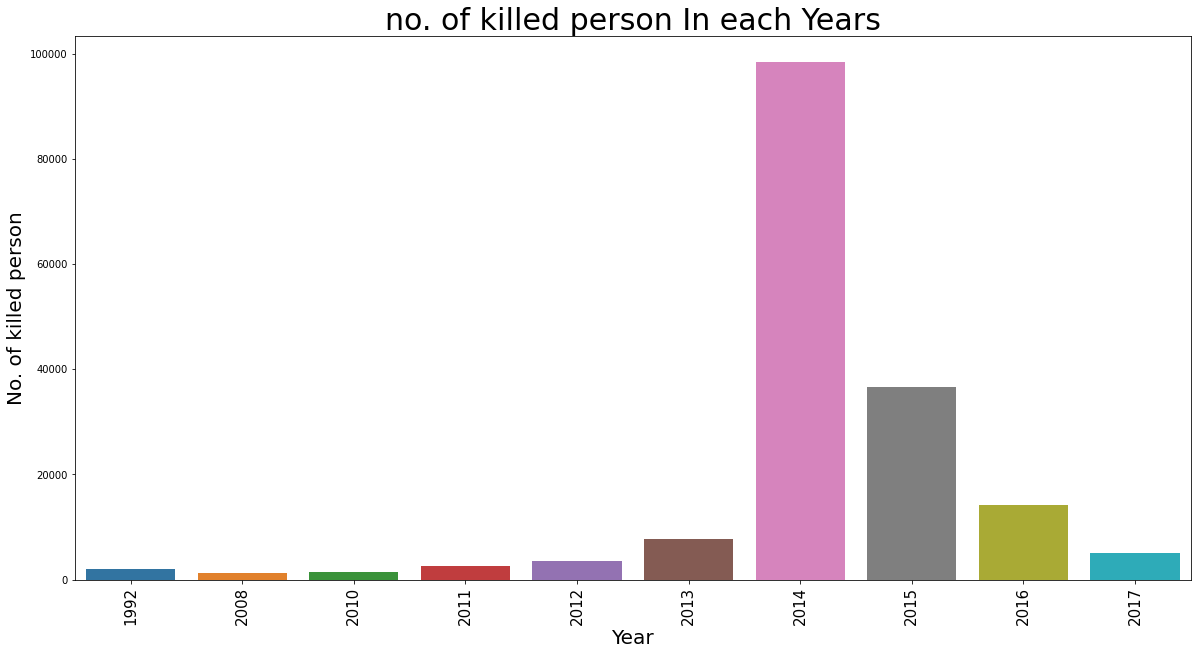

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Year'].value_counts()[:10].index,df['Killed'].value_counts()[:10].values)
plt.title('no. of killed person In each Years',fontsize =30)
plt.xlabel('Year',fontsize =20)
plt.ylabel('No. of killed person',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **3. Country wise Attacks - Top 10**

In [ ]:
country = pd.DataFrame(df["Country"].value_counts())
print(" Name of the Countries (most affected by the attacks) : \n")
country.head(10)

 Name of the Countries (most affected by the attacks) : 



,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


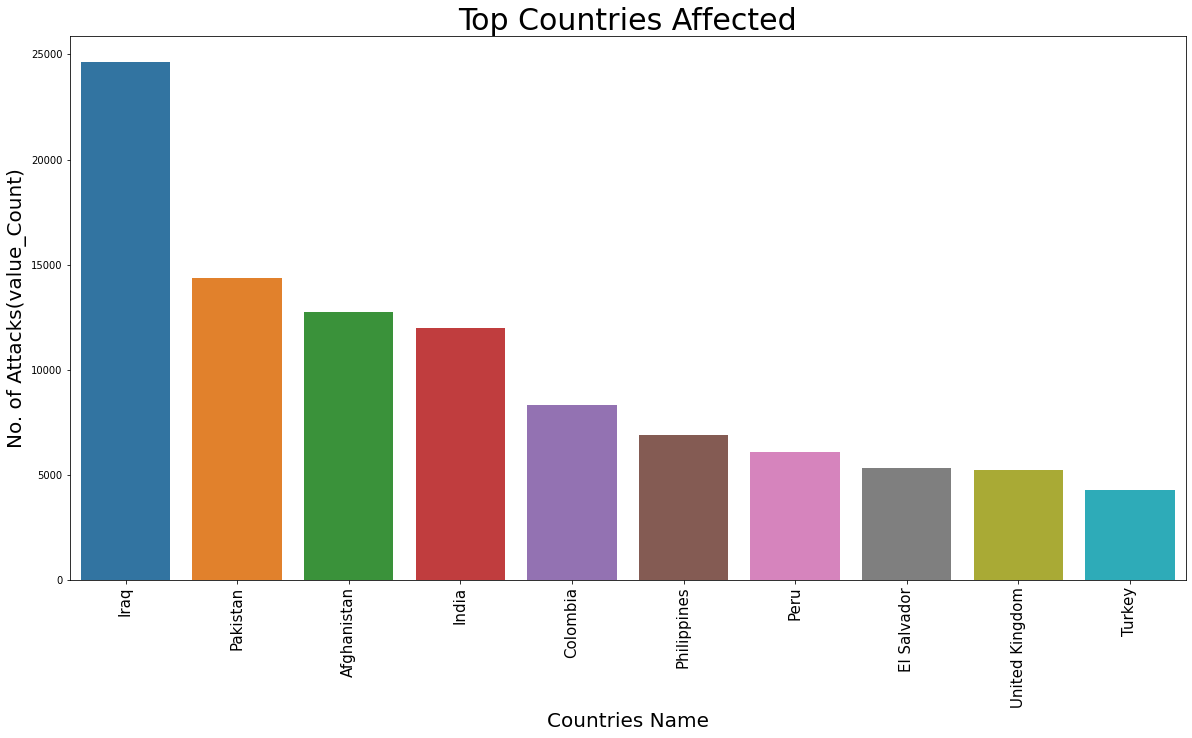

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top Countries Affected',fontsize =30)
plt.xlabel('Countries Name',fontsize =20)
plt.ylabel('No. of Attacks(value_Count)',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **4. Region wise Attacks - Top 10**

In [ ]:
region = pd.DataFrame(df["region"].value_counts())
print("Regions affected most by the attacks: \n")
region.head()

Regions affected most by the attacks: 



,region
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


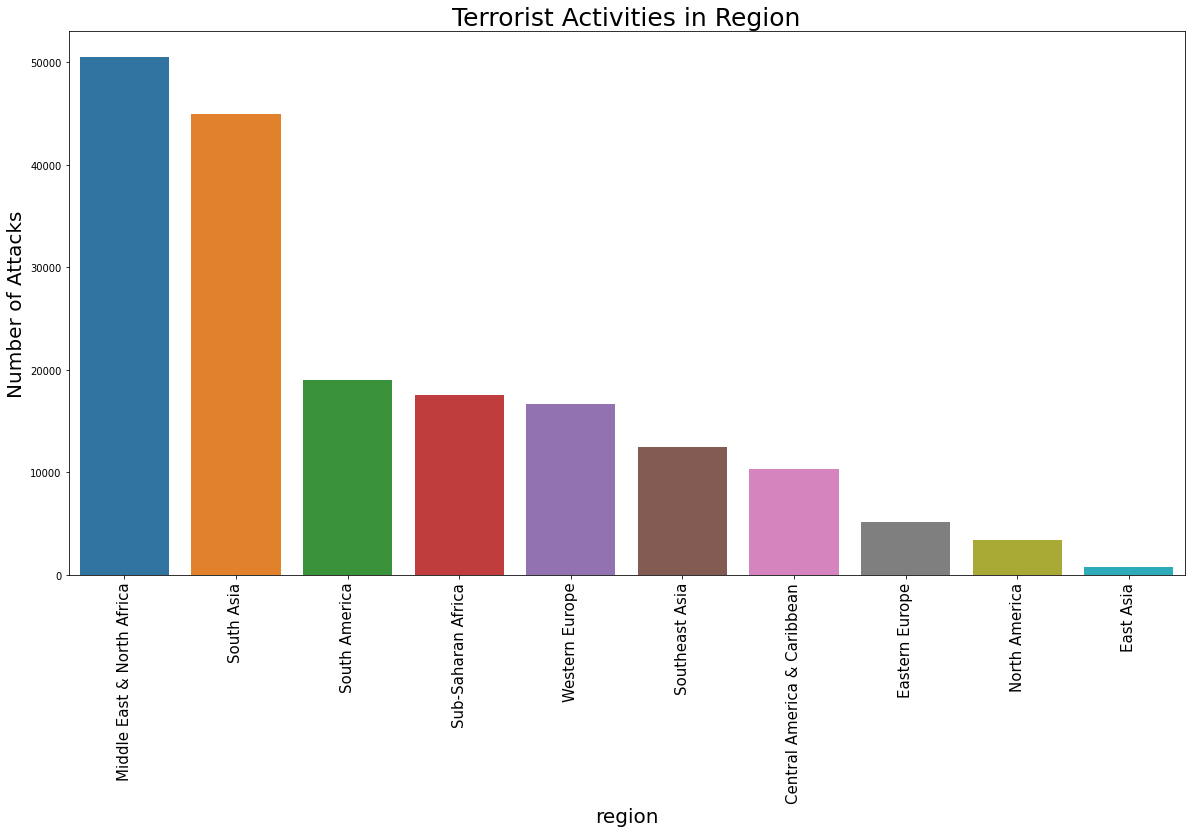

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['region'].value_counts()[:10].index,df['region'].value_counts()[:10].values)
plt.title('Terrorist Activities in Region',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("region",fontsize=20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **5. City wise Attacks - Top 10**

In [ ]:
City= pd.DataFrame(df['City'].value_counts().drop("Unknown"))
print(" Name of the City (most affected by the attacks) : \n")
City.head(10)

 Name of the City (most affected by the attacks) : 



,City
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048
Athens,1019


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


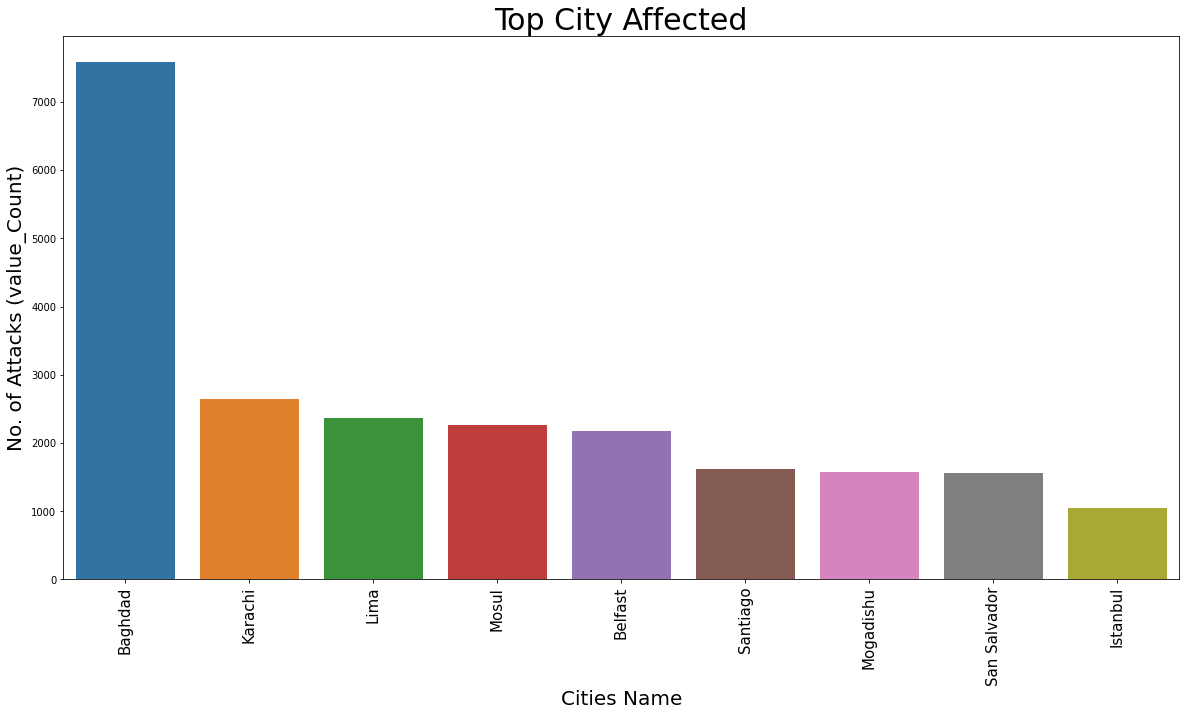

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['City'].value_counts()[1:10].index,df['City'].value_counts()[1:10].values)
plt.title('Top City Affected',fontsize =30)
plt.xlabel('Cities Name',fontsize =20)
plt.ylabel('No. of Attacks (value_Count)',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **6. Attack Type**

In [ ]:
attacks = pd.DataFrame(df["AttackType"].value_counts())
attacks

,AttackType
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


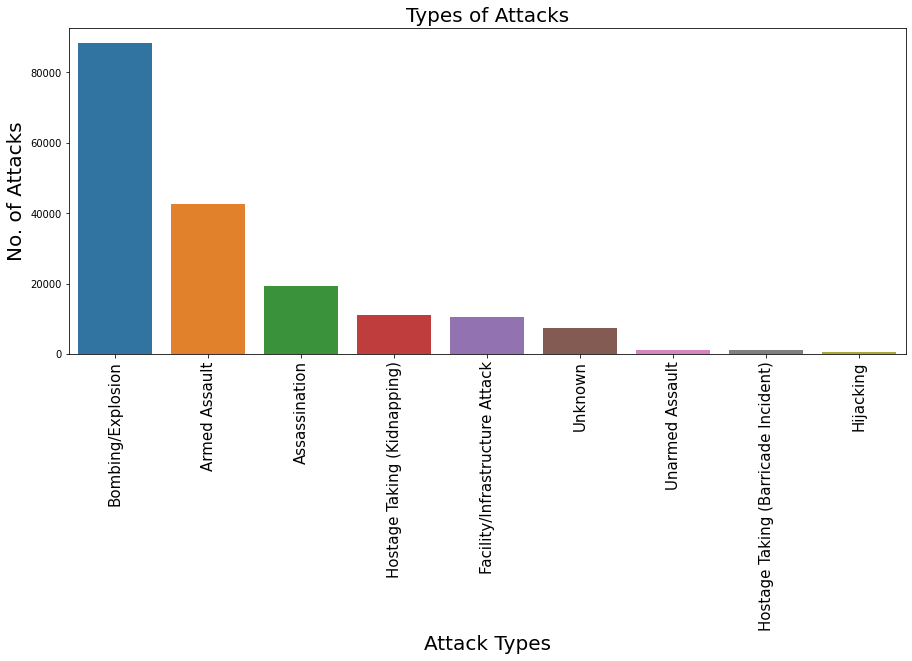

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['AttackType'].value_counts()[:10].index,df['AttackType'].value_counts()[:10].values)
plt.title("Types of Attacks",fontsize= 20)
plt.xlabel("Attack Types",fontsize=20)
plt.xticks(fontsize=15,rotation = 90)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()

## **7. Terget Type**

In [ ]:
target = pd.DataFrame(df['Target_Type'].value_counts())
target

,Target_Type
Private Citizens & Property,43511
Military,27984
Police,24506
Government (General),21283
Business,20669
Transportation,6799
Utilities,6023
Unknown,5898
Religious Figures/Institutions,4440
Educational Institution,4322


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


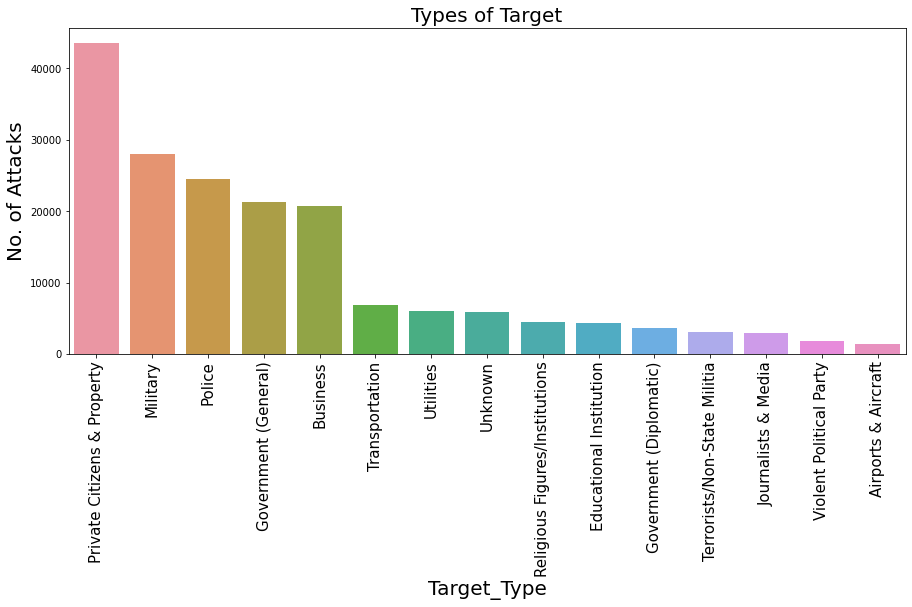

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Target_Type'].value_counts()[:15].index,df['Target_Type'].value_counts()[:15].values)
plt.title("Types of Target",fontsize= 20)
plt.xlabel('Target_Type',fontsize=20)
plt.xticks(fontsize=15,rotation = 90)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()

## **8.Weapon Type :**

In [ ]:
weapon = pd.DataFrame(df['Weapon_type'].value_counts())
weapon

,Weapon_type
Explosives,92426
Firearms,58524
Unknown,15157
Incendiary,11135
Melee,3655
Chemical,321
Sabotage Equipment,141
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Other,114
Biological,35


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


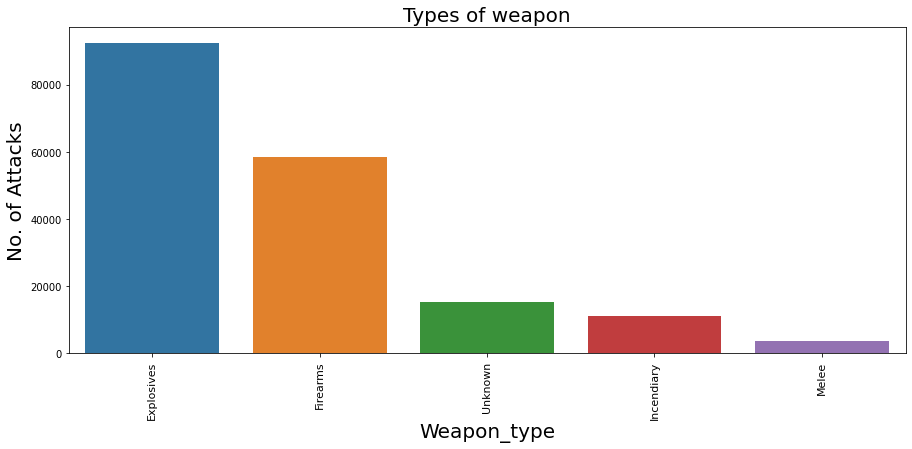

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Weapon_type'].value_counts()[:5].index,df['Weapon_type'].value_counts()[:5].values)
plt.title("Types of weapon",fontsize= 20)
plt.xlabel('Weapon_type',fontsize=20)
plt.xticks(fontsize=11,rotation = 90)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()


## **9. Terrorist Group wise Attacks (Top 10)**

In [ ]:
Group=pd.DataFrame(df["group_name"].value_counts().drop('Unknown'))
Group.head(10)

,group_name
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418
Kurdistan Workers' Party (PKK),2310


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


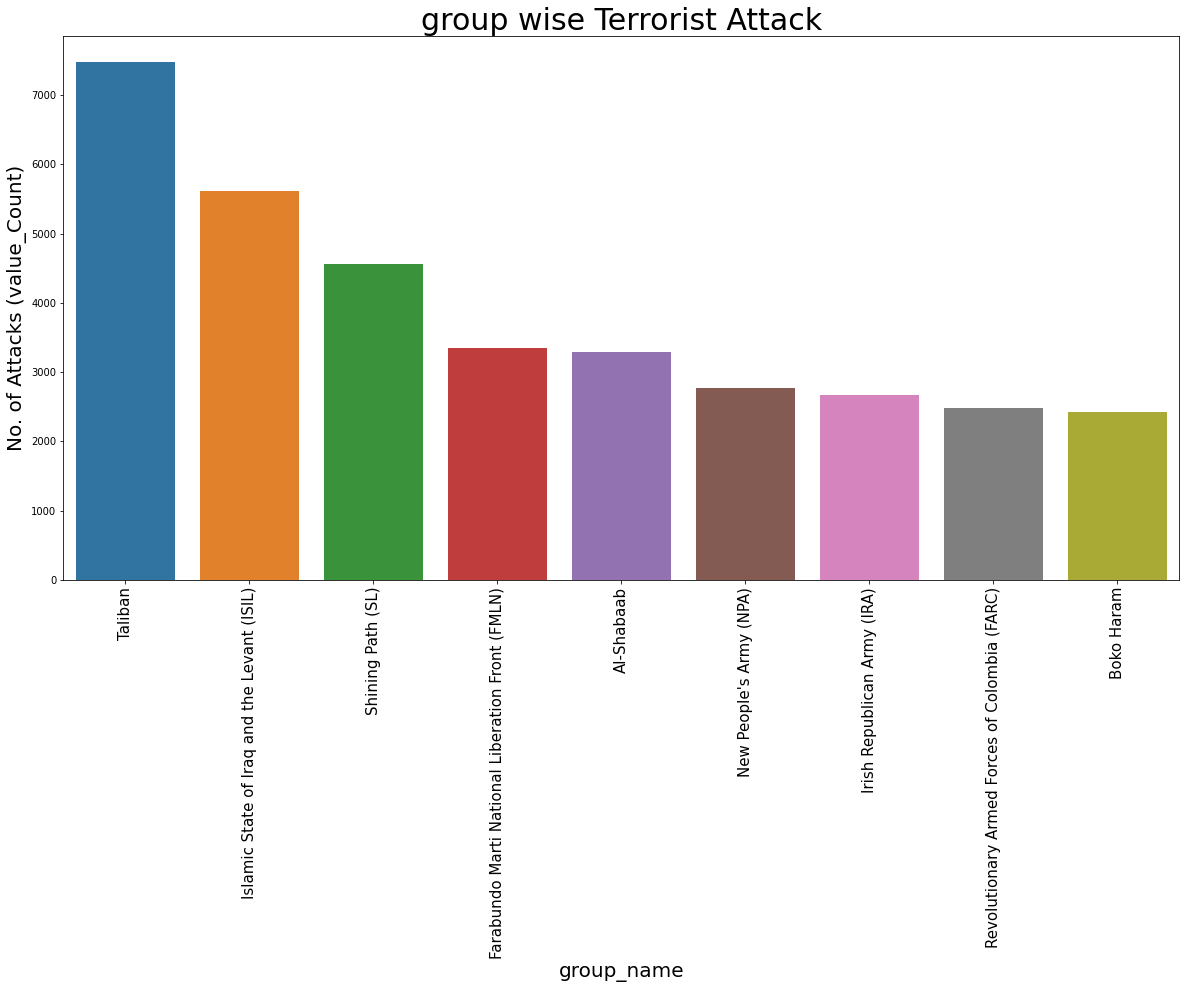

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df["group_name"].value_counts()[1:10].index,df["group_name"].value_counts()[1:10].values)
plt.title('group wise Terrorist Attack',fontsize =30)
plt.xlabel("group_name",fontsize =20)
plt.ylabel('No. of Attacks (value_Count)',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **10. Group and Country wise (Top10)**

In [ ]:
gcv=df[["group_name","Country"]].value_counts().drop("Unknown")
gcv.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


group_name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
Basque Fatherland and Freedom (ETA)               Spain             1975
Communist Party of India - Maoist (CPI-Maoist)    India             1877
Liberation Tigers of Tamil Eelam (LTTE)           Sri Lanka

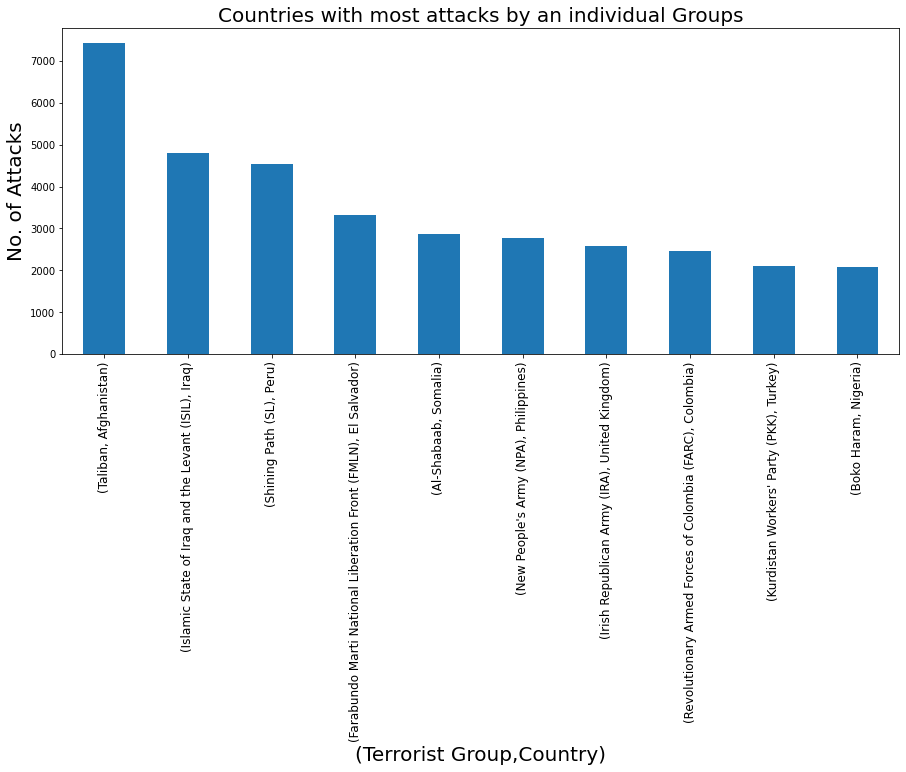

In [ ]:
gcv.head(10).plot(kind ="bar",figsize=(15,6))
plt.title("Countries with most attacks by an individual Groups",fontsize= 20)
plt.xlabel("(Terrorist Group,Country)",fontsize=20)
plt.xticks(fontsize=12)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()


## **Conclusion and Overall Result:**

### **Year with the most terrorist attacks: 2014**

### **Year with maximum no. of killed person : 2014**

### **Country with the most terrorist attacks: Iraq**

### **Region with the most terrorist attacks: Middle East & North Africa**

### **City with the most terrorist attacks: Baghdad**

### **Most Attack Types: Bombing/Explosion**

### **Most Terget Types : Private Citizens & Property**

### **Most weapon Types : Explosives**

### **Group with the most terrorist attacks: Taliban**